***Parameter Definitions***

In [11]:
nx, ny, nz              = 60, 60, 60                     # Spatial Dimension
m                       = 3                              # Number of Patterns
dd_factor               = 2                              # Detector Downsampling Factor

### Loading Data

***1. Cellular Data, Bead Data, Spherical Data***

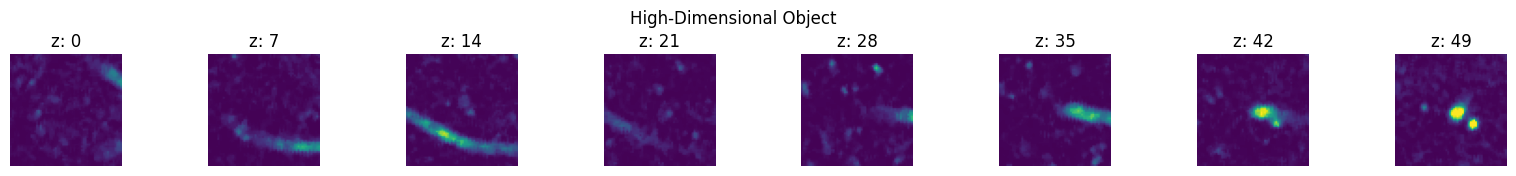

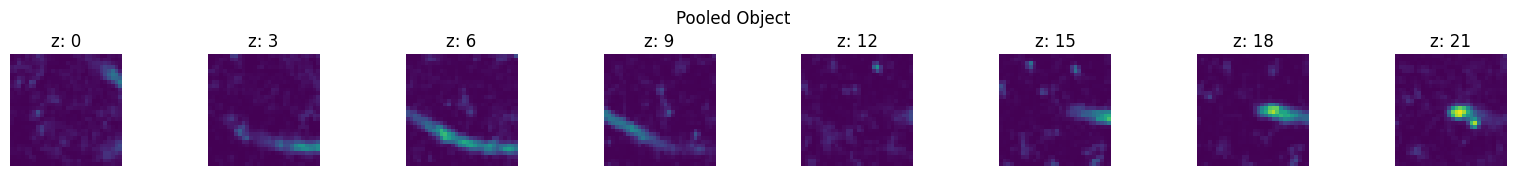

Read Object Parameters
--------------------------
Spatial Dimension	: 60×60×60
Reduced Dimension	: 30×30×30
Raw Data Type		: blood_cell
Device			: cuda



In [12]:
from libs.forward_lib.read_data import ReadData
from libs.forward_lib.visualizer import vis_3d

# Initialize the Read Data Model
RD = ReadData(nx, ny, nz)

# Loading Cellular Data
RD.load_object("blood_cell")

# Visualizing the original Data
RD.visualize_data(is_orginal=True)

# Average Pooling Operation To Reduce Dimension
RD.reduce_dimension()

# Visualize the Dimension Reduced Data
RD.visualize_data()
print(RD)

***2. MNIST Based Data*** (10s)

MNIST Simulator
--------------------------------------------
Spatial Dimension		: 60×60×60
Number of Bodies 		: 1
Original Intensity Weight 	: 0.3



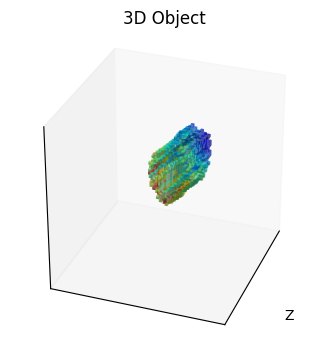

In [13]:
from libs.forward_lib.simulate_data import MnistSimulator
MS = MnistSimulator(nx, ny, nz)
print(MS)

# To Get New Data
MS.update_data()
MS.visualize_object(azim_ang=20, ele_ang=30)

# To access the data directly use MS.X

### Microscopic Model

Forward Model Specifications
----------------------------------------------
Space Dimension 		: 3.0um × 3.0um × 3.0um
voxel Size 			: 0.05um × 0.05um × 0.05um
DMD Patterns 			: 3
Measurement Plane		: [30]
Detector Pool size 		: 2×2
Computational Device 		: cuda


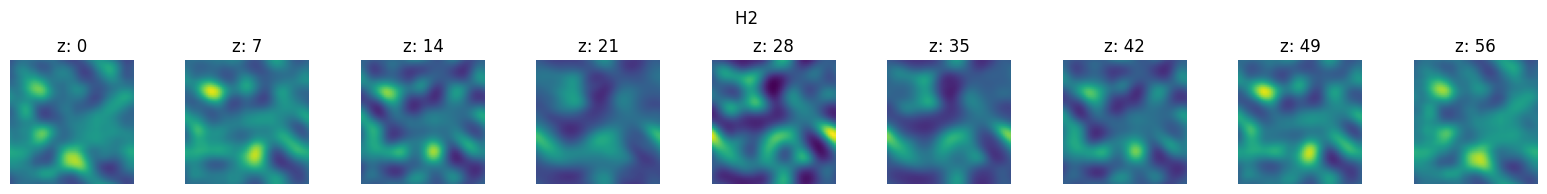

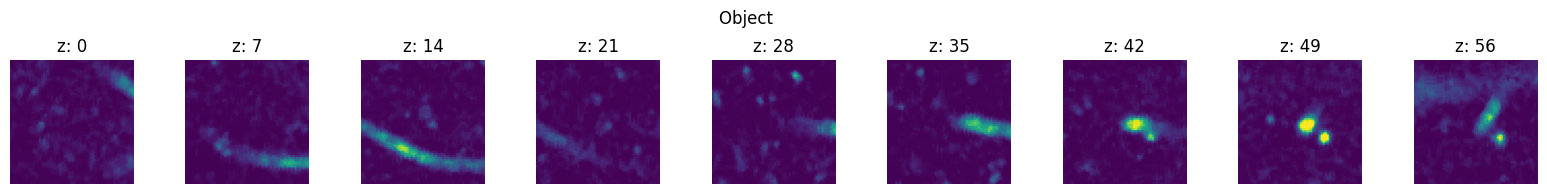

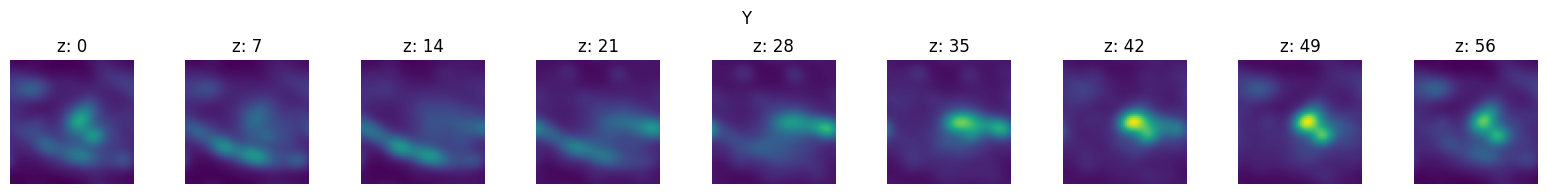

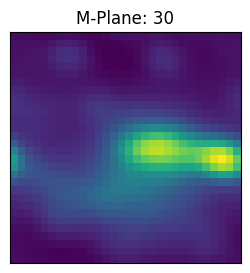

In [18]:
from libs.forward_lib.physical_model import PhysicalModel

# Initialize the Physical Model
PM = PhysicalModel(nx, ny, nz, m, dd_factor=dd_factor)

# Better Understand the Physical Model
print(PM)

measurements = PM.propagate_object(RD.X, verbose=3)             # verbose: [0, 1, 2, 3]

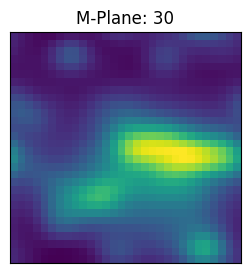

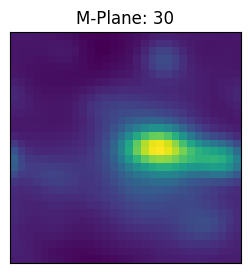

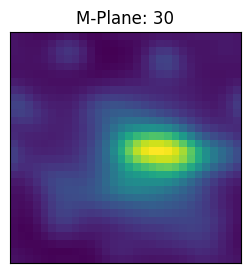

In [27]:
# Change the Initialization of DMD Patterns
PM.init_dmd()

# Measurements from multiple DMD patterns
measurements = PM.extended_propagation(RD.X, verbose=True)

### Linearized Model

In [29]:
from libs.forward_lib.linearized_process import LinearizedModel

# Initialize the Linear Model
LM = LinearizedModel(nx,ny, nz, m, dd_factor, init_call=True)

# Better Understand the Model Parameters
print(LM)

# Calculate the Dimension Reduced Matrix
LM.approximate_A()

# Refer the class for further functionalities

Plane Calculations:   8%|▊         | 5/60 [02:25<26:42, 29.13s/it]